In [1]:
#load csv files
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#laod the olympic metal games tally
medal_path = Path("Resources", "Olympic_Games_Medal_Tally.csv")
medal_df = pd.read_csv(medal_path)
medal_df


,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7
...,...,...,...,...,...,...,...,...,...
1338,2020 Summer Olympics,61,2020,Ghana,GHA,0,0,1,1
1339,2020 Summer Olympics,61,2020,Grenada,GRN,0,0,1,1
1340,2020 Summer Olympics,61,2020,Kuwait,KUW,0,0,1,1
1341,2020 Summer Olympics,61,2020,Republic of Moldova,MDA,0,0,1,1


In [3]:
#fix Russia Data
#1960 Olympics change from Soviet Union
medal_df.at[341, 'country'] = 'Russian Federation'
#1980 Olympics change from Soviet Union
medal_df.at[559, 'country'] = 'Russian Federation'
#2020 Olympics change from ROC
medal_df.at[1254, 'country'] = 'Russian Federation'

rf_values = medal_df[medal_df['country'] == 'Russian Federation']
rf_values

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
49,1908 Summer Olympics,5,1908,Russian Federation,RUS,1,2,0,3
73,1912 Summer Olympics,6,1912,Russian Federation,RUS,0,2,3,5
341,1960 Summer Olympics,15,1960,Russian Federation,URS,43,29,31,103
559,1980 Summer Olympics,20,1980,Russian Federation,URS,80,69,46,195
759,1996 Summer Olympics,24,1996,Russian Federation,RUS,26,21,16,63
838,2000 Summer Olympics,25,2000,Russian Federation,RUS,32,28,29,89
919,2004 Summer Olympics,26,2004,Russian Federation,RUS,28,26,36,90
993,2008 Summer Olympics,53,2008,Russian Federation,RUS,24,13,23,60
1081,2012 Summer Olympics,54,2012,Russian Federation,RUS,18,21,26,65
1167,2016 Summer Olympics,59,2016,Russian Federation,RUS,19,17,20,56


In [5]:
#change East Germany to Germany for 1980
medal_df.at[560, 'country'] = 'Germany'

In [7]:
#create a smaller DF with the selected years
years_to_select = [1960, 1980, 2000, 2020]
sel_years_df = medal_df[medal_df['year'].isin(years_to_select)]
sel_years_df

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
341,1960 Summer Olympics,15,1960,Russian Federation,URS,43,29,31,103
342,1960 Summer Olympics,15,1960,United States,USA,34,21,16,71
343,1960 Summer Olympics,15,1960,Italy,ITA,13,10,13,36
344,1960 Summer Olympics,15,1960,Germany,GER,12,19,11,42
345,1960 Summer Olympics,15,1960,Australia,AUS,8,8,6,22
...,...,...,...,...,...,...,...,...,...
1338,2020 Summer Olympics,61,2020,Ghana,GHA,0,0,1,1
1339,2020 Summer Olympics,61,2020,Grenada,GRN,0,0,1,1
1340,2020 Summer Olympics,61,2020,Kuwait,KUW,0,0,1,1
1341,2020 Summer Olympics,61,2020,Republic of Moldova,MDA,0,0,1,1


In [9]:
# load the gdp csv
gdp_path = Path("Resources", "Country_GDP.csv")
gdp_df = pd.read_csv(gdp_path)

#fix United Kingdom to Great Britain
gdp_df.at[81, 'Country Name'] = 'Great Britain'

#add GDP amount to Russia Federation for 1980 and 1960
gdp_df.at[202, '1980'] = 1210000000000
gdp_df.at[202, '1960'] = 142400000000

#change header from Country Name to Country
renamed_gdp = gdp_df.rename(columns = {"Country Name":'country'})
renamed_gdp


,country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.121696e+10,2.230747e+10,2.370247e+10,2.577938e+10,2.804954e+10,3.037491e+10,...,8.992957e+11,8.298300e+11,9.401055e+11,1.012719e+12,1.006527e+12,9.290741e+11,1.086772e+12,1.183962e+12,1.236163e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,1.450216e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.188413e+10,1.268566e+10,1.360683e+10,1.443998e+10,1.576911e+10,1.693448e+10,...,7.693673e+11,6.921811e+11,6.857502e+11,7.681896e+11,8.239336e+11,7.871467e+11,8.459930e+11,8.771408e+11,7.965862e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.472296e+10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.295848e+09,6.682677e+09,7.180765e+09,7.878760e+09,7.899738e+09,7.717145e+09,9.413404e+09,9.354903e+09,1.043835e+10,NaN
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.244449e+10,3.131783e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,3.467098e+11,3.235855e+11,3.814488e+11,4.052607e+11,3.893300e+11,3.382914e+11,4.201178e+11,4.052709e+11,3.777816e+11,NaN
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.813776e+10,2.209642e+10,2.916378e+10,2.816263e+10,NaN


In [11]:
#merge sel_years_df and gdp_df
medals_gdp = pd.merge(sel_years_df, renamed_gdp, on=["country"])
medals_gdp

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total,Country Code,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,1960 Summer Olympics,15,1960,Russian Federation,URS,43,29,31,103,RUS,...,1.363482e+12,1.276786e+12,1.574199e+12,1.657329e+12,1.693115e+12,1.493076e+12,1.843392e+12,2.266029e+12,2.021421e+12,NaN
1,1960 Summer Olympics,15,1960,United States,USA,34,21,16,71,USA,...,1.829502e+13,1.880491e+13,1.961210e+13,2.065652e+13,2.152140e+13,2.132295e+13,2.359403e+13,2.574411e+13,2.736094e+13,NaN
2,1960 Summer Olympics,15,1960,Italy,ITA,13,10,13,36,ITA,...,1.836638e+12,1.877072e+12,1.961796e+12,2.091932e+12,2.011302e+12,1.897462e+12,2.154875e+12,2.066972e+12,2.254851e+12,NaN
3,1960 Summer Olympics,15,1960,Germany,GER,12,19,11,42,DEU,...,3.357586e+12,3.469853e+12,3.690849e+12,3.974443e+12,3.889178e+12,3.887727e+12,4.278504e+12,4.082469e+12,4.456081e+12,NaN
4,1960 Summer Olympics,15,1960,Australia,AUS,8,8,6,22,AUS,...,1.351769e+12,1.207581e+12,1.326882e+12,1.429734e+12,1.394671e+12,1.330382e+12,1.559034e+12,1.692957e+12,1.723827e+12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2020 Summer Olympics,61,2020,Burkina Faso,BUR,0,0,1,1,BFA,...,1.183216e+10,1.283336e+10,1.410696e+10,1.589007e+10,1.603281e+10,1.772501e+10,1.964317e+10,1.882022e+10,2.032462e+10,NaN
211,2020 Summer Olympics,61,2020,Ghana,GHA,0,0,1,1,GHA,...,4.940601e+10,5.616493e+10,6.040592e+10,6.729891e+10,6.833797e+10,7.004310e+10,7.952442e+10,7.426336e+10,7.637039e+10,NaN
212,2020 Summer Olympics,61,2020,Grenada,GRN,0,0,1,1,GRD,...,9.970074e+08,1.061641e+09,1.125685e+09,1.166515e+09,1.213485e+09,1.043411e+09,1.122800e+09,1.224578e+09,1.320334e+09,NaN
213,2020 Summer Olympics,61,2020,Kuwait,KUW,0,0,1,1,KWT,...,1.145856e+11,1.094067e+11,1.206875e+11,1.382025e+11,1.386963e+11,1.075130e+11,1.417773e+11,1.828095e+11,1.617722e+11,NaN


In [13]:
#double check Great Britain 
gb_df = medals_gdp[medals_gdp['country'] == 'Great Britain']
gb_df

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total,Country Code,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
9,1960 Summer Olympics,15,1960,Great Britain,GBR,2,6,12,20,GBR,...,2.927911e+12,2.689107e+12,2.680148e+12,2.871340e+12,2.851407e+12,2.697807e+12,3.141506e+12,3.088840e+12,3.340032e+12,NaN
44,1980 Summer Olympics,20,1980,Great Britain,GBR,5,7,9,21,GBR,...,2.927911e+12,2.689107e+12,2.680148e+12,2.871340e+12,2.851407e+12,2.697807e+12,3.141506e+12,3.088840e+12,3.340032e+12,NaN
76,2000 Summer Olympics,25,2000,Great Britain,GBR,11,10,7,28,GBR,...,2.927911e+12,2.689107e+12,2.680148e+12,2.871340e+12,2.851407e+12,2.697807e+12,3.141506e+12,3.088840e+12,3.340032e+12,NaN
138,2020 Summer Olympics,61,2020,Great Britain,GBR,22,20,22,64,GBR,...,2.927911e+12,2.689107e+12,2.680148e+12,2.871340e+12,2.851407e+12,2.697807e+12,3.141506e+12,3.088840e+12,3.340032e+12,NaN


In [15]:
#reorganize dataframe
medals_gdp_reorg = medals_gdp[['year', 'country', 'total', '2020', '2000', '1980', '1960']]
medals_gdp_reorg

,year,country,total,2020,2000,1980,1960
0,1960,Russian Federation,103,1.493076e+12,2.597101e+11,1.210000e+12,1.424000e+11
1,1960,United States,71,2.132295e+13,1.025095e+13,2.857307e+12,5.419886e+11
2,1960,Italy,36,1.897462e+12,1.146677e+12,4.772568e+11,4.191581e+10
3,1960,Germany,42,3.887727e+12,1.947982e+12,9.502909e+11,8.431095e+10
4,1960,Australia,22,1.330382e+12,4.161678e+11,1.499855e+11,1.860656e+10
...,...,...,...,...,...,...,...
210,2020,Burkina Faso,1,1.772501e+10,2.968370e+09,1.928720e+09,3.304428e+08
211,2020,Ghana,1,7.004310e+10,4.982851e+09,4.445228e+09,1.223944e+09
212,2020,Grenada,1,1.043411e+09,5.200444e+08,1.109005e+08,NaN
213,2020,Kuwait,1,1.075130e+11,3.771874e+10,2.863887e+10,NaN


In [17]:
#get the 2020 Summer Olympic results - Japan Host
gdp2020_df = medals_gdp_reorg[medals_gdp_reorg['year'] == 2020]
gdp2020_df

,year,country,total,2020,2000,1980,1960
135,2020,United States,113,2.132295e+13,1.025095e+13,2.857307e+12,5.419886e+11
136,2020,People's Republic of China,89,1.468774e+13,1.211332e+12,1.911492e+11,5.971625e+10
137,2020,Japan,58,5.055587e+12,4.968359e+12,1.129377e+12,4.741924e+10
138,2020,Great Britain,64,2.697807e+12,1.665535e+12,5.649477e+11,7.323397e+10
139,2020,Russian Federation,71,1.493076e+12,2.597101e+11,1.210000e+12,1.424000e+11
...,...,...,...,...,...,...,...
210,2020,Burkina Faso,1,1.772501e+10,2.968370e+09,1.928720e+09,3.304428e+08
211,2020,Ghana,1,7.004310e+10,4.982851e+09,4.445228e+09,1.223944e+09
212,2020,Grenada,1,1.043411e+09,5.200444e+08,1.109005e+08,NaN
213,2020,Kuwait,1,1.075130e+11,3.771874e+10,2.863887e+10,NaN


In [ ]:
#check the mean of the columns
#gdpmean2020 = gdp2020_df['2020'].mean()
#print("The average GDP of the countries that won medals in 2020 is $" + str(gdpmean2020))

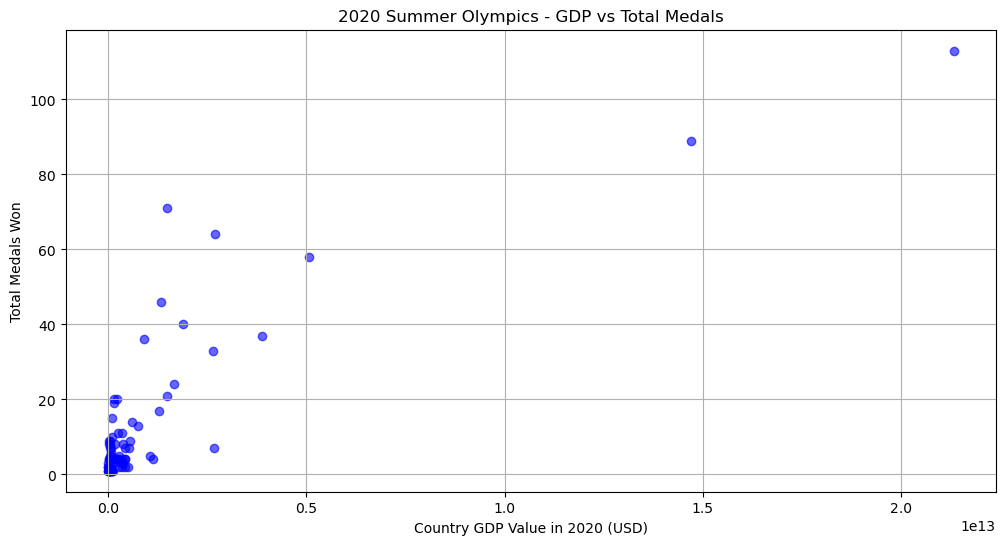

In [19]:
#scatterplot
#x-axis = gdp, y_axis = total metals

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.scatter(gdp2020_df['2020'], gdp2020_df['total'], color='b', alpha=0.6)
plt.xlabel('Country GDP Value in 2020 (USD)')
plt.ylabel('Total Medals Won')
plt.title('2020 Summer Olympics - GDP vs Total Medals')
plt.grid(True)
plt.show()

In [21]:
#linear regresson x-axis versus y-axis
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(gdp2020_df['2020'],gdp2020_df['total'])

In [23]:
#create equation of predicted number of medals
pe_fit = pe_slope * gdp2020_df['2020'] + pe_int

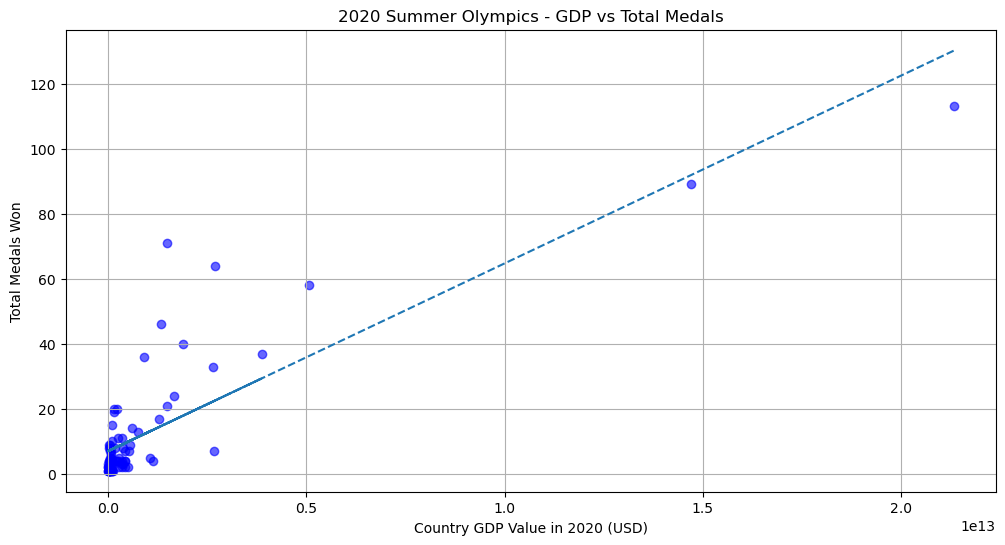

In [25]:
#plot the linear model on top of the scatter plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.scatter(gdp2020_df['2020'], gdp2020_df['total'], color='b', alpha=0.6)
plt.plot(gdp2020_df['2020'], pe_fit, "--")
plt.xlabel('Country GDP Value in 2020 (USD)')
plt.ylabel('Total Medals Won')
plt.title('2020 Summer Olympics - GDP vs Total Medals')
plt.grid(True)
plt.show()

In [27]:
#DF top10gdp
top10gdp2020 = gdp2020_df.nlargest(10, '2020')
top10gdp2020

,year,country,total,2020,2000,1980,1960
135,2020,United States,113,2.132295e+13,1.025095e+13,2.857307e+12,5.419886e+11
136,2020,People's Republic of China,89,1.468774e+13,1.211332e+12,1.911492e+11,5.971625e+10
137,2020,Japan,58,5.055587e+12,4.968359e+12,1.129377e+12,4.741924e+10
143,2020,Germany,37,3.887727e+12,1.947982e+12,9.502909e+11,8.431095e+10
138,2020,Great Britain,64,2.697807e+12,1.665535e+12,5.649477e+11,7.323397e+10
176,2020,India,7,2.674852e+12,4.683955e+11,1.863286e+11,3.702988e+10
142,2020,France,33,2.647419e+12,1.365640e+12,7.012884e+11,6.222548e+10
144,2020,Italy,40,1.897462e+12,1.146677e+12,4.772568e+11,4.191581e+10
145,2020,Canada,24,1.655685e+12,7.447734e+11,2.747766e+11,4.056377e+10
139,2020,Russian Federation,71,1.493076e+12,2.597101e+11,1.210000e+12,1.424000e+11


<function matplotlib.pyplot.show(close=None, block=None)>

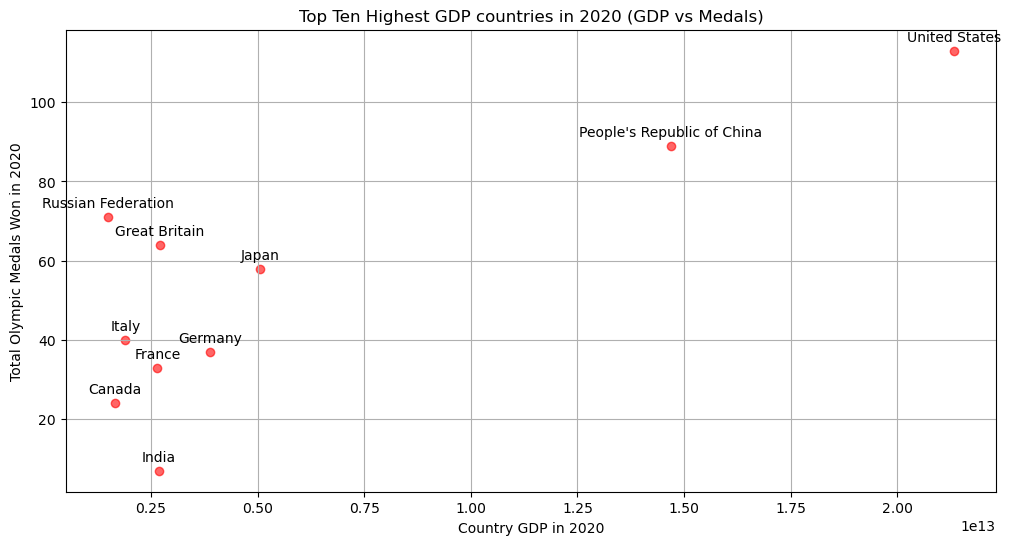

In [29]:
#plot and label top10gdp
plt.figure(figsize=(12,6))
plt.scatter(top10gdp2020['2020'], top10gdp2020['total'], color='red', alpha=0.6)
plt.xlabel('Country GDP in 2020')
plt.ylabel('Total Olympic Medals Won in 2020')
plt.title('Top Ten Highest GDP countries in 2020 (GDP vs Medals)')
plt.grid(True)

for i, row in top10gdp2020.iterrows():
    plt.annotate(row['country'], (row['2020'], row['total']), textcoords='offset points', xytext=(0,7), ha='center')
plt.show

In [31]:
#DF bottom 60 gdp
bot60gdp2020 = gdp2020_df.nsmallest(60, '2020')
bot60gdp2020

,year,country,total,2020,2000,1980,1960
212,2020,Grenada,1,1.043411e+09,5.200444e+08,1.109005e+08,NaN
197,2020,San Marino,3,1.541248e+09,1.005159e+09,NaN,NaN
185,2020,Fiji,2,4.432466e+09,1.678220e+09,1.202619e+09,1.123284e+08
188,2020,Bermuda,1,6.887147e+09,3.480219e+09,6.133000e+08,8.446665e+07
172,2020,Kosovo,2,7.717145e+09,NaN,NaN,NaN
203,2020,Namibia,1,1.058375e+10,3.922232e+09,2.421990e+09,NaN
214,2020,Syrian Arab Republic,1,1.115589e+10,1.893705e+10,1.306242e+10,8.577044e+08
204,2020,North Macedonia,1,1.236104e+10,3.772859e+09,NaN,NaN
194,2020,Armenia,4,1.264170e+10,1.911564e+09,NaN,NaN
195,2020,Mongolia,4,1.331298e+10,1.136896e+09,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

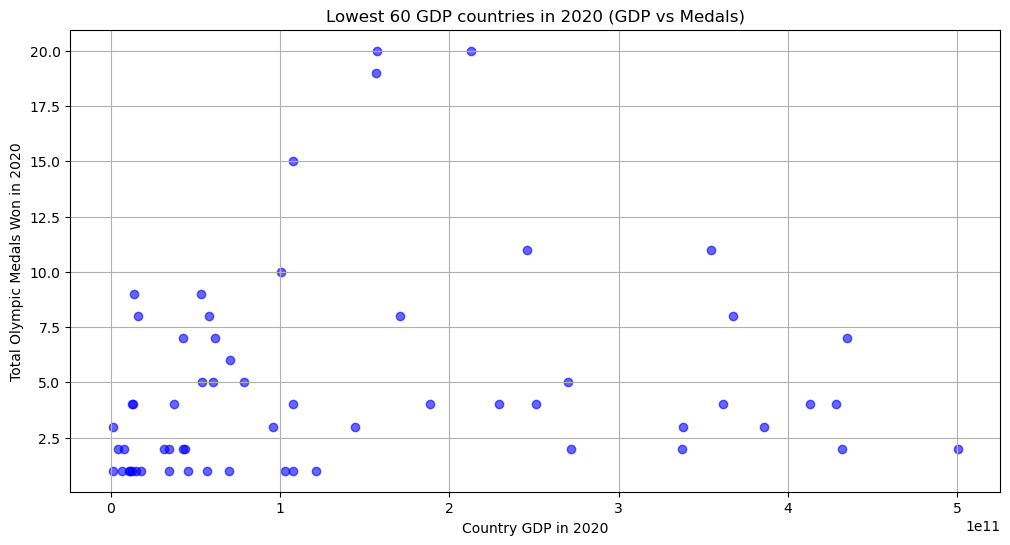

In [33]:
#plt and label bottom 60
plt.figure(figsize=(12,6))
plt.scatter(bot60gdp2020['2020'], bot60gdp2020['total'], color='blue', alpha=0.6)
plt.xlabel('Country GDP in 2020')
plt.ylabel('Total Olympic Medals Won in 2020')
plt.title('Lowest 60 GDP countries in 2020 (GDP vs Medals)')
plt.grid(True)
plt.show

In [35]:
#2000 olympics Austrailia
gdp2000_df = medals_gdp_reorg[medals_gdp_reorg['year'] == 2000]
gdp2000_df

,year,country,total,2020,2000,1980,1960
67,2000,United States,93,2.132295e+13,1.025095e+13,2.857307e+12,5.419886e+11
68,2000,Russian Federation,89,1.493076e+12,2.597101e+11,1.210000e+12,1.424000e+11
69,2000,People's Republic of China,58,1.468774e+13,1.211332e+12,1.911492e+11,5.971625e+10
70,2000,Australia,58,1.330382e+12,4.161678e+11,1.499855e+11,1.860656e+10
71,2000,Germany,56,3.887727e+12,1.947982e+12,9.502909e+11,8.431095e+10
...,...,...,...,...,...,...,...
130,2000,India,1,2.674852e+12,4.683955e+11,1.863286e+11,3.702988e+10
131,2000,Israel,1,4.132677e+11,1.360358e+11,2.524979e+10,3.052994e+09
132,2000,Kuwait,1,1.075130e+11,3.771874e+10,2.863887e+10,NaN
133,2000,North Macedonia,1,1.236104e+10,3.772859e+09,NaN,NaN


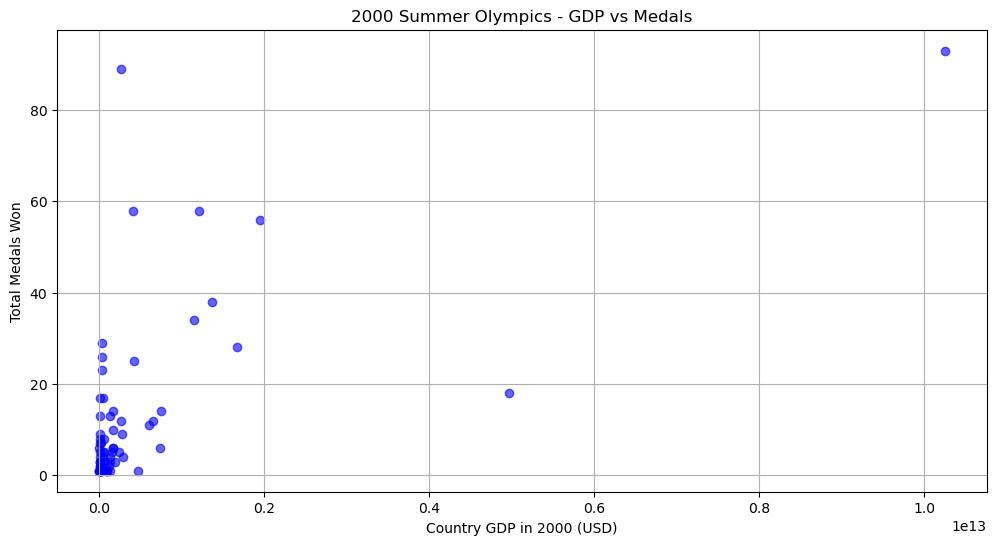

In [37]:
#plot 2000olympics
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.scatter(gdp2000_df['2000'], gdp2000_df['total'], color='b', alpha=0.6)
plt.xlabel('Country GDP in 2000 (USD)')
plt.ylabel('Total Medals Won')
plt.title('2000 Summer Olympics - GDP vs Medals')
plt.grid(True)
plt.show()

In [39]:
# top10 df
top10gdp2000 = gdp2000_df.nlargest(10, '2000')
top10gdp2000

,year,country,total,2020,2000,1980,1960
67,2000,United States,93,2.132295e+13,1.025095e+13,2.857307e+12,5.419886e+11
80,2000,Japan,18,5.055587e+12,4.968359e+12,1.129377e+12,4.741924e+10
71,2000,Germany,56,3.887727e+12,1.947982e+12,9.502909e+11,8.431095e+10
76,2000,Great Britain,28,2.697807e+12,1.665535e+12,5.649477e+11,7.323397e+10
72,2000,France,38,2.647419e+12,1.365640e+12,7.012884e+11,6.222548e+10
69,2000,People's Republic of China,58,1.468774e+13,1.211332e+12,1.911492e+11,5.971625e+10
73,2000,Italy,34,1.897462e+12,1.146677e+12,4.772568e+11,4.191581e+10
89,2000,Canada,14,1.655685e+12,7.447734e+11,2.747766e+11,4.056377e+10
101,2000,Mexico,6,1.120832e+12,7.420613e+11,2.055771e+11,1.304000e+10
113,2000,Brazil,12,1.476107e+12,6.554482e+11,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

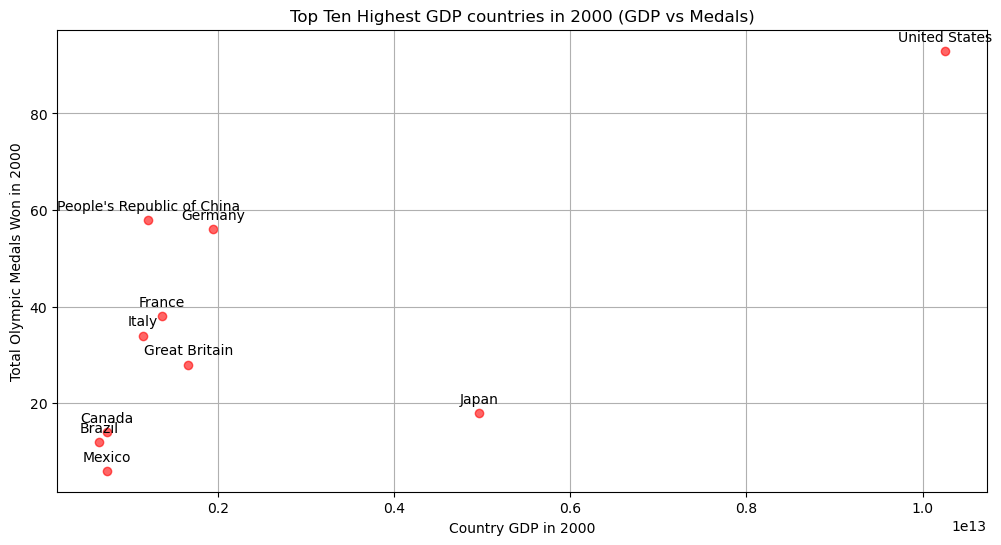

In [41]:
#plot and label top10
plt.figure(figsize=(12,6))
plt.scatter(top10gdp2000['2000'], top10gdp2000['total'], color='red', alpha=0.6)
plt.xlabel('Country GDP in 2000')
plt.ylabel('Total Olympic Medals Won in 2000')
plt.title('Top Ten Highest GDP countries in 2000 (GDP vs Medals)')
plt.grid(True)

for i, row in top10gdp2000.iterrows():
    plt.annotate(row['country'], (row['2000'], row['total']), textcoords='offset points', xytext=(0,7), ha='center')
plt.show

In [43]:
#1980 Olympics - Russia (host)
gdp1980_df = medals_gdp_reorg[medals_gdp_reorg['year'] == 1980]
gdp1980_df

,year,country,total,2020,2000,1980,1960
36,1980,Russian Federation,195,1.493076e+12,2.597101e+11,1.210000e+12,1.424000e+11
37,1980,Germany,126,3.887727e+12,1.947982e+12,9.502909e+11,8.431095e+10
38,1980,Bulgaria,41,7.036876e+10,1.324599e+10,1.983923e+10,NaN
39,1980,Cuba,20,1.073518e+11,3.056540e+10,1.991289e+10,NaN
40,1980,Italy,15,1.897462e+12,1.146677e+12,4.772568e+11,4.191581e+10
41,1980,Hungary,32,1.572890e+11,4.721841e+10,2.304157e+10,NaN
42,1980,Romania,25,2.513625e+11,3.725374e+10,NaN,NaN
43,1980,France,14,2.647419e+12,1.365640e+12,7.012884e+11,6.222548e+10
44,1980,Great Britain,21,2.697807e+12,1.665535e+12,5.649477e+11,7.323397e+10
45,1980,Poland,32,5.994427e+11,1.722205e+11,NaN,NaN


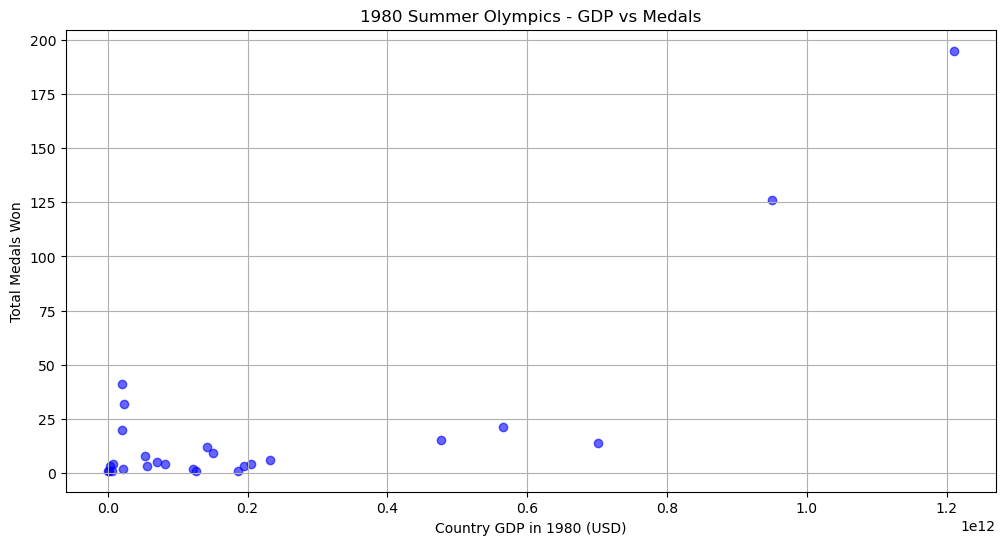

In [45]:
#plt 1980 olympics
plt.figure(figsize=(12, 6))
plt.scatter(gdp1980_df['1980'], gdp1980_df['total'], color='b', alpha=0.6)
plt.xlabel('Country GDP in 1980 (USD)')
plt.ylabel('Total Medals Won')
plt.title('1980 Summer Olympics - GDP vs Medals')
plt.grid(True)
plt.show()

In [47]:
#1980 top10 df
top10gdp1980 = gdp1980_df.nlargest(10, '1980')
top10gdp1980

,year,country,total,2020,2000,1980,1960
36,1980,Russian Federation,195,1.493076e+12,2.597101e+11,1.210000e+12,1.424000e+11
37,1980,Germany,126,3.887727e+12,1.947982e+12,9.502909e+11,8.431095e+10
43,1980,France,14,2.647419e+12,1.365640e+12,7.012884e+11,6.222548e+10
44,1980,Great Britain,21,2.697807e+12,1.665535e+12,5.649477e+11,7.323397e+10
40,1980,Italy,15,1.897462e+12,1.146677e+12,4.772568e+11,4.191581e+10
53,1980,Spain,6,1.278129e+12,5.983633e+11,2.327668e+11,1.243339e+10
60,1980,Mexico,4,1.120832e+12,7.420613e+11,2.055771e+11,1.304000e+10
61,1980,Netherlands,3,9.097935e+11,4.174793e+11,1.951521e+11,1.326346e+10
57,1980,India,1,2.674852e+12,4.683955e+11,1.863286e+11,3.702988e+10
48,1980,Australia,9,1.330382e+12,4.161678e+11,1.499855e+11,1.860656e+10


<function matplotlib.pyplot.show(close=None, block=None)>

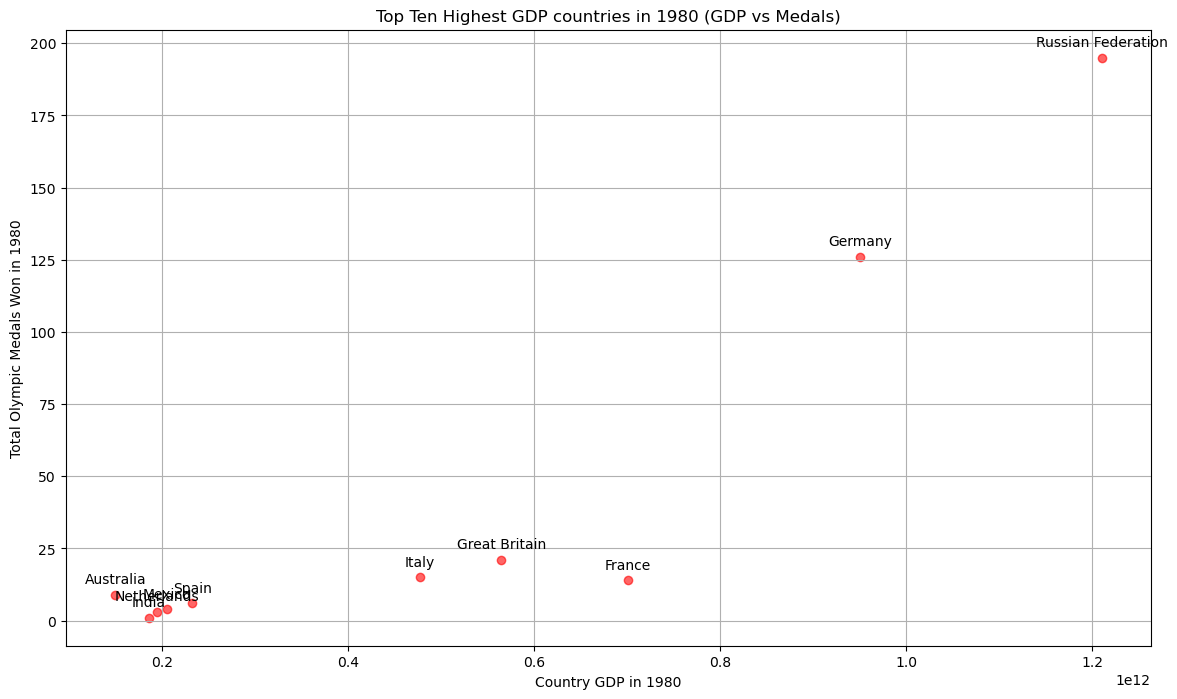

In [49]:
#plot and label 1980 top 10
plt.figure(figsize=(14,8))
plt.scatter(top10gdp1980['1980'], top10gdp1980['total'], color='red', alpha=0.6)
plt.xlabel('Country GDP in 1980')
plt.ylabel('Total Olympic Medals Won in 1980')
plt.title('Top Ten Highest GDP countries in 1980 (GDP vs Medals)')
plt.grid(True)

for i, row in top10gdp1980.iterrows():
    plt.annotate(row['country'], (row['1980'], row['total']), textcoords='offset points', xytext=(0,8), ha='center')
plt.show

In [51]:
#1960 Olympics
gdp1960_df = medals_gdp_reorg[medals_gdp_reorg['year'] == 1960]
gdp1960_df

,year,country,total,2020,2000,1980,1960
0,1960,Russian Federation,103,1.493076e+12,2.597101e+11,1.210000e+12,1.424000e+11
1,1960,United States,71,2.132295e+13,1.025095e+13,2.857307e+12,5.419886e+11
2,1960,Italy,36,1.897462e+12,1.146677e+12,4.772568e+11,4.191581e+10
3,1960,Germany,42,3.887727e+12,1.947982e+12,9.502909e+11,8.431095e+10
4,1960,Australia,22,1.330382e+12,4.161678e+11,1.499855e+11,1.860656e+10
5,1960,Hungary,21,1.572890e+11,4.721841e+10,2.304157e+10,NaN
6,1960,Japan,18,5.055587e+12,4.968359e+12,1.129377e+12,4.741924e+10
7,1960,Poland,21,5.994427e+11,1.722205e+11,NaN,NaN
8,1960,Romania,10,2.513625e+11,3.725374e+10,NaN,NaN
9,1960,Great Britain,20,2.697807e+12,1.665535e+12,5.649477e+11,7.323397e+10


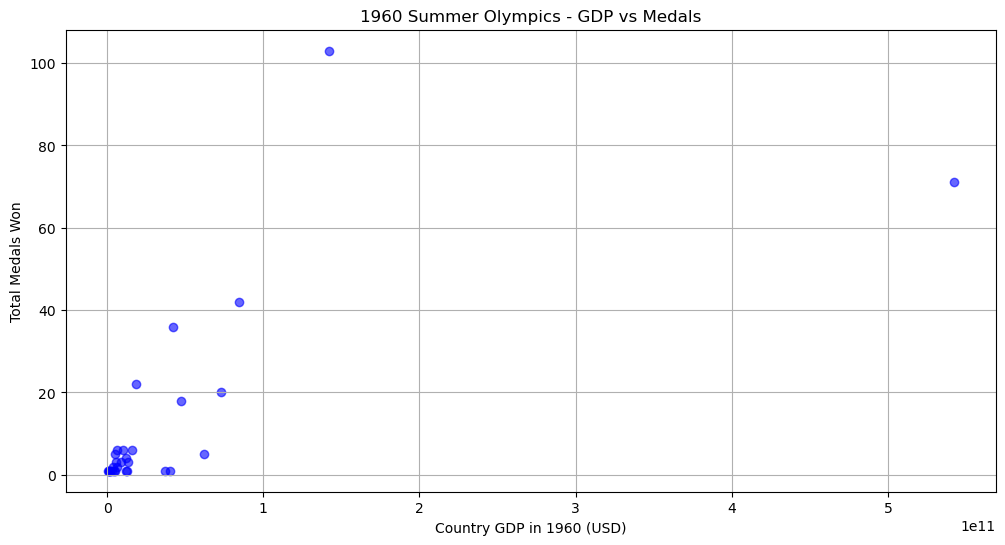

In [53]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.scatter(gdp1960_df['1960'], gdp1960_df['total'], color='b', alpha=0.6)
plt.xlabel('Country GDP in 1960 (USD)')
plt.ylabel('Total Medals Won')
plt.title('1960 Summer Olympics - GDP vs Medals')
plt.grid(True)
plt.show()

In [55]:
#1960 Olympics
top10gdp1960 = gdp1960_df.nlargest(10, '1960')
top10gdp1960

,year,country,total,2020,2000,1980,1960
1,1960,United States,71,2.132295e+13,1.025095e+13,2.857307e+12,5.419886e+11
0,1960,Russian Federation,103,1.493076e+12,2.597101e+11,1.210000e+12,1.424000e+11
3,1960,Germany,42,3.887727e+12,1.947982e+12,9.502909e+11,8.431095e+10
9,1960,Great Britain,20,2.697807e+12,1.665535e+12,5.649477e+11,7.323397e+10
21,1960,France,5,2.647419e+12,1.365640e+12,7.012884e+11,6.222548e+10
6,1960,Japan,18,5.055587e+12,4.968359e+12,1.129377e+12,4.741924e+10
2,1960,Italy,36,1.897462e+12,1.146677e+12,4.772568e+11,4.191581e+10
26,1960,Canada,1,1.655685e+12,7.447734e+11,2.747766e+11,4.056377e+10
28,1960,India,1,2.674852e+12,4.683955e+11,1.863286e+11,3.702988e+10
4,1960,Australia,22,1.330382e+12,4.161678e+11,1.499855e+11,1.860656e+10


<function matplotlib.pyplot.show(close=None, block=None)>

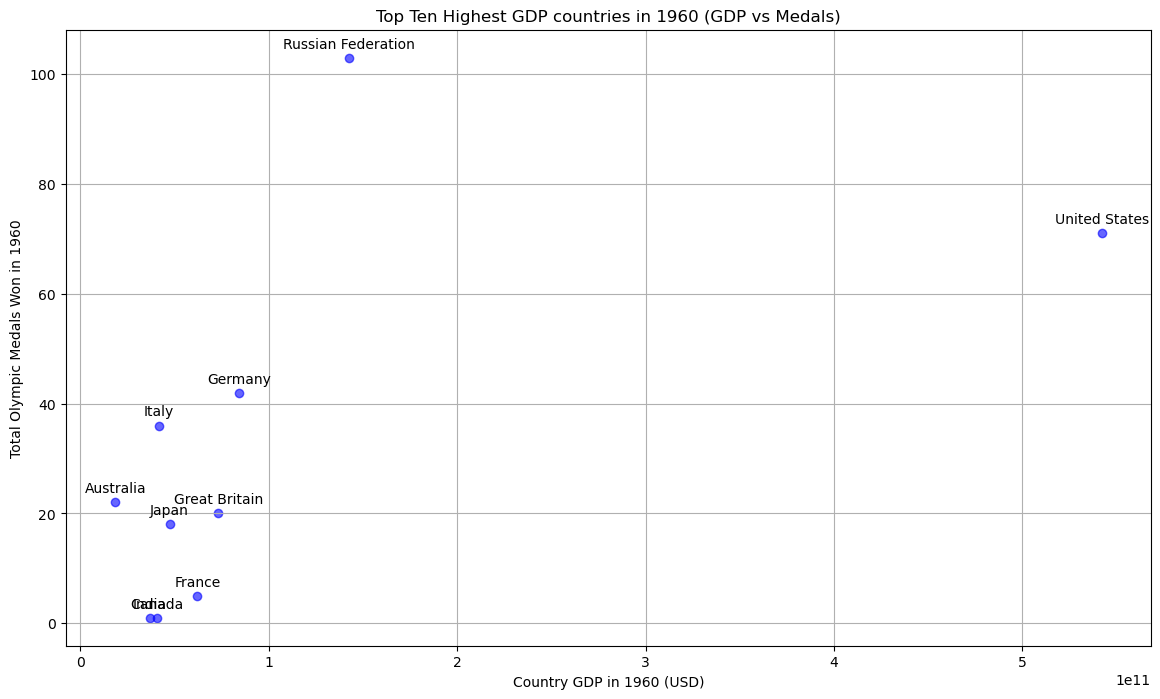

In [57]:
#plot 1960 olympics
plt.figure(figsize=(14,8))
plt.scatter(top10gdp1960['1960'], top10gdp1960['total'], color='blue', alpha=0.6)
plt.xlabel('Country GDP in 1960 (USD)')
plt.ylabel('Total Olympic Medals Won in 1960')
plt.title('Top Ten Highest GDP countries in 1960 (GDP vs Medals)')
plt.grid(True)

for i, row in top10gdp1960.iterrows():
    plt.annotate(row['country'], (row['1960'], row['total']), textcoords='offset points', xytext=(0,7), ha='center')
plt.show

In [59]:
#make a population dataframe
pop_path = Path("Resources", "Country_Pop.csv")
pop_df = pd.read_csv(pop_path)
renamed_pop = pop_df.rename(columns = {'Country Name':'country'})
renamed_pop.head()

,country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0,NaN


In [61]:
#merge medal and pop dfs
medals_pop = pd.merge(sel_years_df, renamed_pop, on='country')
medals_pop.head()

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total,Country Code,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,1960 Summer Olympics,15,1960,Russian Federation,URS,43,29,31,103,RUS,...,144640716.0,145015460.0,145293260.0,145398106.0,145453291.0,145245148.0,144746762.0,144236933.0,143826130.0,NaN
1,1960 Summer Olympics,15,1960,United States,USA,34,21,16,71,USA,...,320738994.0,323071755.0,325122128.0,326838199.0,328329953.0,331526933.0,332048977.0,333271411.0,334914895.0,NaN
2,1960 Summer Olympics,15,1960,Italy,ITA,13,10,13,36,ITA,...,60730582.0,60627498.0,60536709.0,60421760.0,59729081.0,59438851.0,59133173.0,58940425.0,58761146.0,NaN
3,1960 Summer Olympics,15,1960,Germany,GER,12,19,11,42,DEU,...,81686611.0,82348669.0,82657002.0,82905782.0,83092962.0,83160871.0,83196078.0,83797985.0,84482267.0,NaN
4,1960 Summer Olympics,15,1960,Australia,AUS,8,8,6,22,AUS,...,23815995.0,24190907.0,24592588.0,24963258.0,25334826.0,25649248.0,25685412.0,26014399.0,26638544.0,NaN


In [63]:
#reorganize the df for the data thats needed
medals_pop_reorg = medals_pop[['year', 'country', 'total', '2020', '2000', '1980', '1960']]
medals_pop_reorg

,year,country,total,2020,2000,1980,1960
0,1960,Russian Federation,103,145245148.0,146596869.0,139010000.0,119897000.0
1,1960,United States,71,331526933.0,282162411.0,227225000.0,180671000.0
2,1960,Italy,36,59438851.0,56942108.0,56433883.0,50199700.0
3,1960,Germany,42,83160871.0,82211508.0,78288576.0,72814900.0
4,1960,Australia,22,25649248.0,19028802.0,14692000.0,10276477.0
...,...,...,...,...,...,...,...
206,2020,Burkina Faso,1,21522626.0,11882888.0,6932967.0,4783259.0
207,2020,Ghana,1,32180401.0,19665502.0,11865246.0,6911510.0
208,2020,Grenada,1,123663.0,107432.0,94838.0,93772.0
209,2020,Kuwait,1,4360444.0,1934901.0,1493870.0,305415.0


In [65]:
#2020population
pop2020_df = medals_pop_reorg[medals_pop_reorg['year'] == 2020]
pop2020_df

,year,country,total,2020,2000,1980,1960
132,2020,United States,113,3.315269e+08,2.821624e+08,227225000.0,180671000.0
133,2020,People's Republic of China,89,1.411100e+09,1.262645e+09,981235000.0,667070000.0
134,2020,Japan,58,1.262610e+08,1.268430e+08,116807000.0,93216000.0
135,2020,Russian Federation,71,1.452451e+08,1.465969e+08,139010000.0,119897000.0
136,2020,Australia,46,2.564925e+07,1.902880e+07,14692000.0,10276477.0
...,...,...,...,...,...,...,...
206,2020,Burkina Faso,1,2.152263e+07,1.188289e+07,6932967.0,4783259.0
207,2020,Ghana,1,3.218040e+07,1.966550e+07,11865246.0,6911510.0
208,2020,Grenada,1,1.236630e+05,1.074320e+05,94838.0,93772.0
209,2020,Kuwait,1,4.360444e+06,1.934901e+06,1493870.0,305415.0


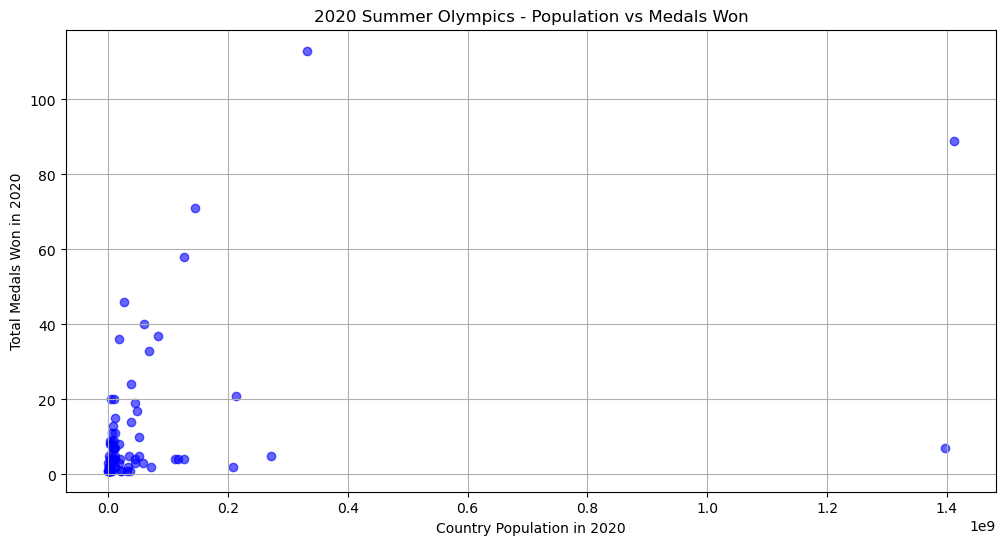

In [67]:
#plot 2020pop (78 data points)
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.scatter(pop2020_df['2020'], pop2020_df['total'], color='b', alpha=0.6)
plt.xlabel('Country Population in 2020')
plt.ylabel('Total Medals Won in 2020')
plt.title('2020 Summer Olympics - Population vs Medals Won')
plt.grid(True)
plt.show()

In [71]:
#top 10 populated countries
top10pop2020 = pop2020_df.nlargest(10, '2020')
top10pop2020

,year,country,total,2020,2000,1980,1960
133,2020,People's Republic of China,89,1.411100e+09,1.262645e+09,981235000.0,667070000.0
172,2020,India,7,1.396387e+09,1.059634e+09,696828385.0,445954579.0
132,2020,United States,113,3.315269e+08,2.821624e+08,227225000.0,180671000.0
176,2020,Indonesia,5,2.718580e+08,2.140724e+08,148177096.0,88382881.0
142,2020,Brazil,21,2.131963e+08,1.758737e+08,122288383.0,73092515.0
196,2020,Nigeria,2,2.083274e+08,1.228520e+08,72951439.0,44928342.0
135,2020,Russian Federation,71,1.452451e+08,1.465969e+08,139010000.0,119897000.0
134,2020,Japan,58,1.262610e+08,1.268430e+08,116807000.0,93216000.0
203,2020,Mexico,4,1.259983e+08,9.787344e+07,67705186.0,36268055.0
177,2020,Ethiopia,4,1.171909e+08,6.703187e+07,34945469.0,21739710.0


<function matplotlib.pyplot.show(close=None, block=None)>

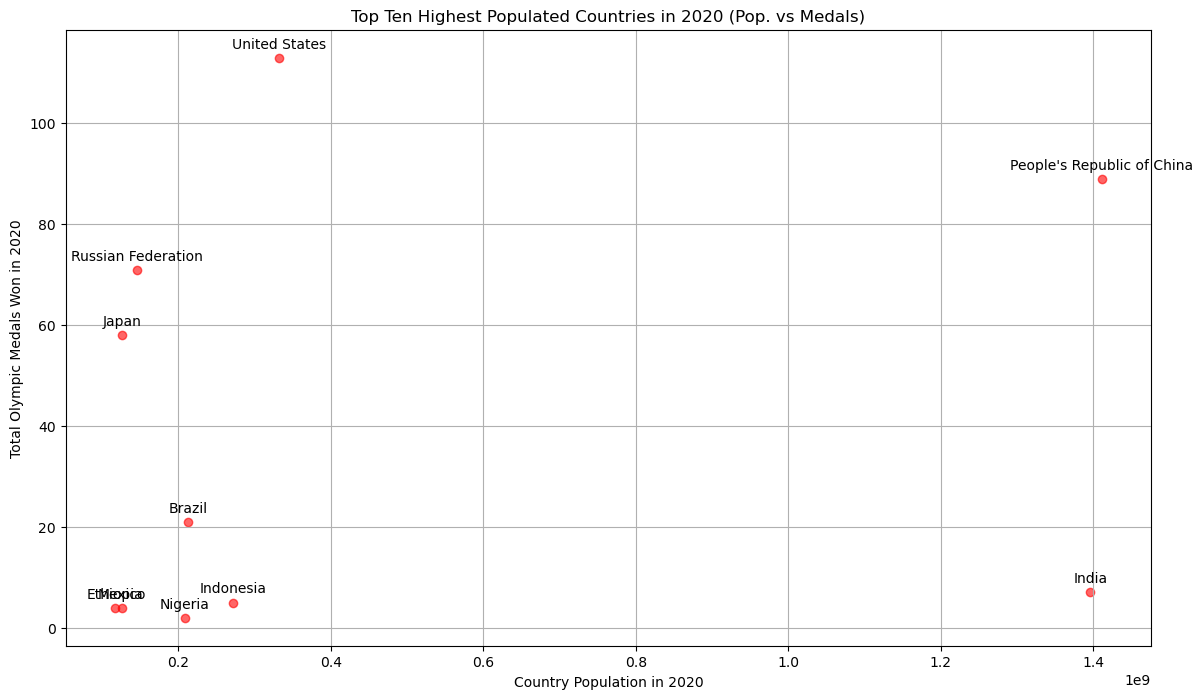

In [75]:
#plot the top 10 pop and label the countries
plt.figure(figsize=(14,8))
plt.scatter(top10pop2020['2020'], top10pop2020['total'], color='red', alpha=0.6)
plt.xlabel('Country Population in 2020')
plt.ylabel('Total Olympic Medals Won in 2020')
plt.grid(True)
plt.title('Top Ten Highest Populated Countries in 2020 (Pop. vs Medals)')

for i, row in top10pop2020.iterrows():
    plt.annotate(row['country'], (row['2020'], row['total']), textcoords='offset points', xytext=(0,7), ha='center')
plt.show

In [77]:
bot60pop2020 = pop2020_df.nsmallest(60, '2020')
bot60pop2020

,year,country,total,2020,2000,1980,1960
193,2020,San Marino,3,34007.0,26823.0,21346.0,15556.0
184,2020,Bermuda,1,63893.0,61833.0,54670.0,44400.0
208,2020,Grenada,1,123663.0,107432.0,94838.0,93772.0
181,2020,Fiji,2,920422.0,832509.0,644582.0,401841.0
180,2020,Estonia,2,1329522.0,1396985.0,1477219.0,1211537.0
197,2020,Bahrain,1,1477469.0,711442.0,362595.0,160691.0
168,2020,Kosovo,2,1790133.0,1823286.0,1589395.0,990150.0
200,2020,North Macedonia,1,1856124.0,2026350.0,1907023.0,1462368.0
182,2020,Latvia,2,1900449.0,2367550.0,2511701.0,2120979.0
159,2020,Slovenia,5,2102419.0,1988925.0,1901315.0,1584720.0


<function matplotlib.pyplot.show(close=None, block=None)>

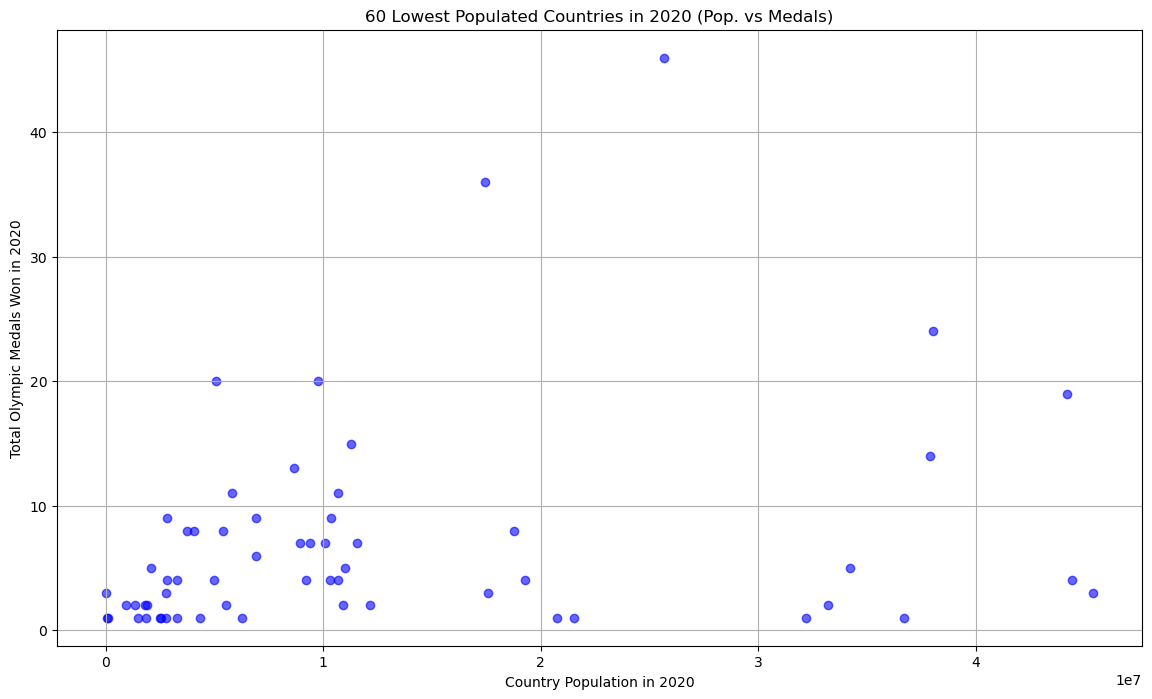

In [79]:
plt.figure(figsize=(14,8))
plt.scatter(bot60pop2020['2020'], bot60pop2020['total'], color='blue', alpha=0.6)
plt.xlabel('Country Population in 2020')
plt.ylabel('Total Olympic Medals Won in 2020')
plt.grid(True)
plt.title('60 Lowest Populated Countries in 2020 (Pop. vs Medals)')
plt.show

In [81]:
pop2000_df = medals_pop_reorg[medals_pop_reorg['year'] == 2000]
pop2000_df

,year,country,total,2020,2000,1980,1960
65,2000,United States,93,3.315269e+08,2.821624e+08,227225000.0,180671000.0
66,2000,Russian Federation,89,1.452451e+08,1.465969e+08,139010000.0,119897000.0
67,2000,People's Republic of China,58,1.411100e+09,1.262645e+09,981235000.0,667070000.0
68,2000,Australia,58,2.564925e+07,1.902880e+07,14692000.0,10276477.0
69,2000,Germany,56,8.316087e+07,8.221151e+07,78288576.0,72814900.0
...,...,...,...,...,...,...,...
127,2000,India,1,1.396387e+09,1.059634e+09,696828385.0,445954579.0
128,2000,Israel,1,9.215100e+06,6.289000e+06,3878000.0,2114020.0
129,2000,Kuwait,1,4.360444e+06,1.934901e+06,1493870.0,305415.0
130,2000,North Macedonia,1,1.856124e+06,2.026350e+06,1907023.0,1462368.0


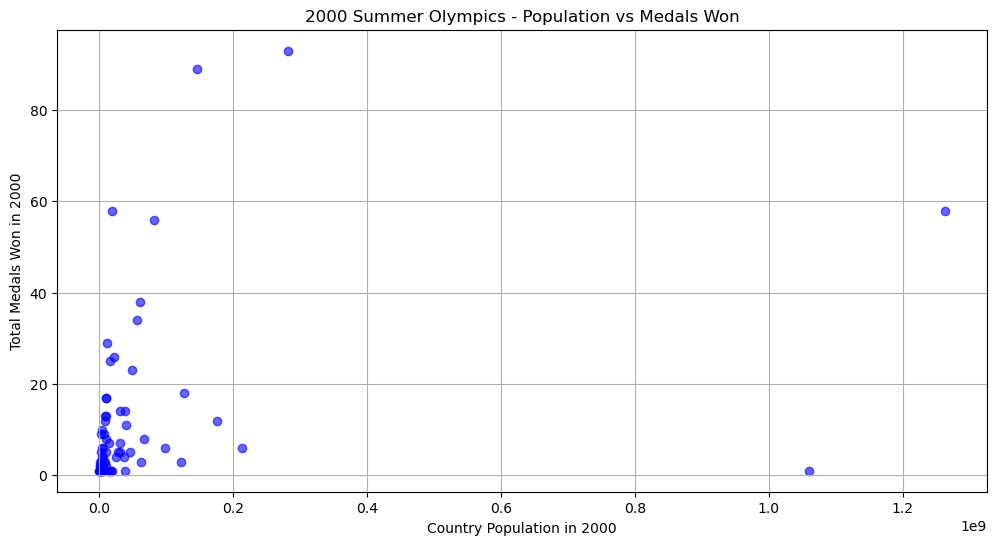

In [83]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.scatter(pop2000_df['2000'], pop2000_df['total'], color='b', alpha=0.6)
plt.xlabel('Country Population in 2000')
plt.ylabel('Total Medals Won in 2000')
plt.title('2000 Summer Olympics - Population vs Medals Won')
plt.grid(True)
plt.show()

In [85]:
pop1980_df = medals_pop_reorg[medals_pop_reorg['year'] == 1980]
pop1980_df

,year,country,total,2020,2000,1980,1960
35,1980,Russian Federation,195,1.452451e+08,1.465969e+08,139010000.0,119897000.0
36,1980,Germany,126,8.316087e+07,8.221151e+07,78288576.0,72814900.0
37,1980,Bulgaria,41,6.934015e+06,8.170172e+06,8861535.0,7867374.0
38,1980,Cuba,20,1.130070e+07,1.110579e+07,9809107.0,7267395.0
39,1980,Italy,15,5.943885e+07,5.694211e+07,56433883.0,50199700.0
40,1980,Hungary,32,9.750149e+06,1.021097e+07,10711122.0,9983967.0
41,1980,Romania,25,1.926525e+07,2.244297e+07,22207282.0,18406905.0
42,1980,France,14,6.757111e+07,6.092138e+07,55052582.0,46649927.0
43,1980,Poland,32,3.789907e+07,3.825863e+07,35574150.0,29637450.0
44,1980,Sweden,12,1.035344e+07,8.872109e+06,8310531.0,7484656.0


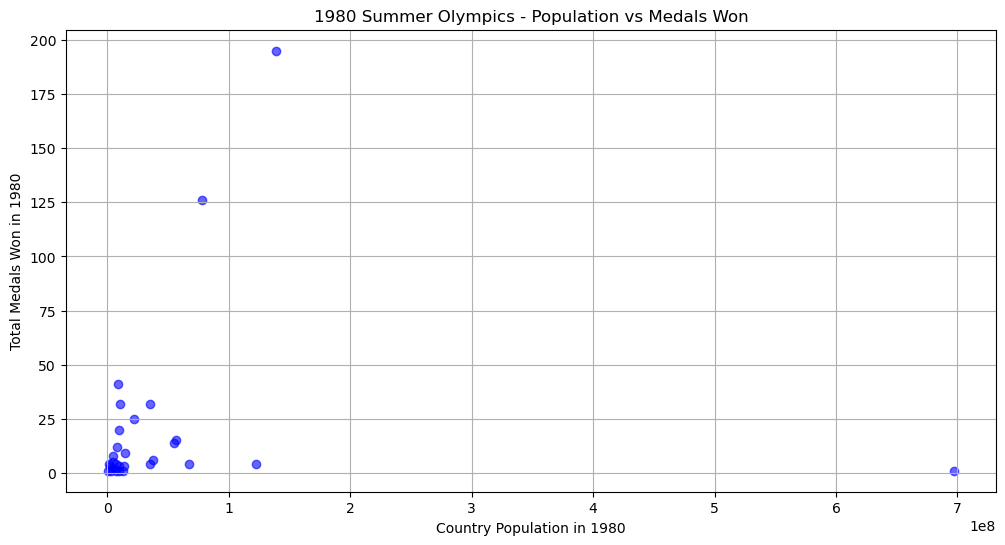

In [87]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.scatter(pop1980_df['1980'], pop1980_df['total'], color='b', alpha=0.6)
plt.xlabel('Country Population in 1980')
plt.ylabel('Total Medals Won in 1980')
plt.title('1980 Summer Olympics - Population vs Medals Won')
plt.grid(True)
plt.show()

In [89]:
pop1960_df = medals_pop_reorg[medals_pop_reorg['year'] == 1960]
pop1960_df

,year,country,total,2020,2000,1980,1960
0,1960,Russian Federation,103,1.452451e+08,1.465969e+08,139010000.0,119897000.0
1,1960,United States,71,3.315269e+08,2.821624e+08,227225000.0,180671000.0
2,1960,Italy,36,5.943885e+07,5.694211e+07,56433883.0,50199700.0
3,1960,Germany,42,8.316087e+07,8.221151e+07,78288576.0,72814900.0
4,1960,Australia,22,2.564925e+07,1.902880e+07,14692000.0,10276477.0
5,1960,Hungary,21,9.750149e+06,1.021097e+07,10711122.0,9983967.0
6,1960,Japan,18,1.262610e+08,1.268430e+08,116807000.0,93216000.0
7,1960,Poland,21,3.789907e+07,3.825863e+07,35574150.0,29637450.0
8,1960,Romania,10,1.926525e+07,2.244297e+07,22207282.0,18406905.0
9,1960,Denmark,6,5.831404e+06,5.339616e+06,5123027.0,4579603.0


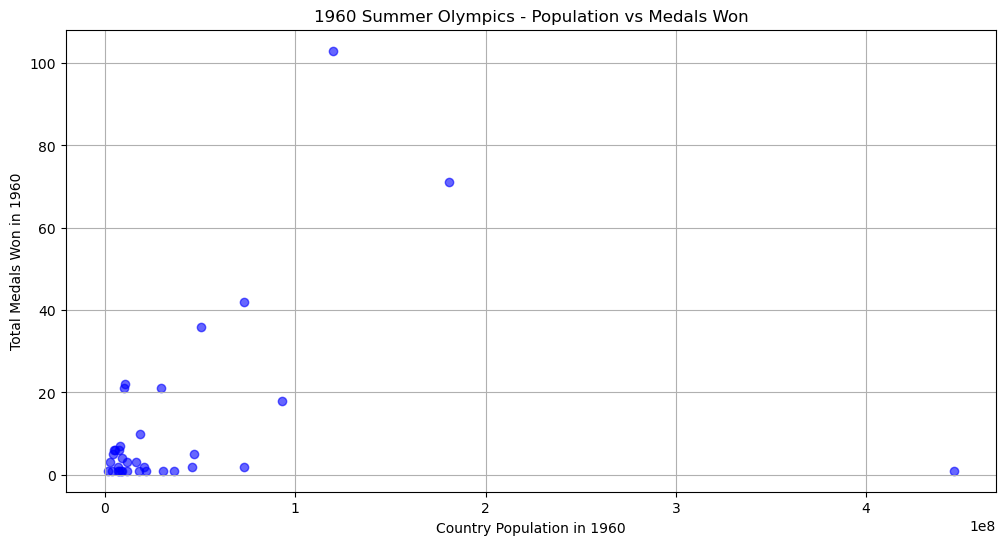

In [91]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.scatter(pop1960_df['1960'], pop1960_df['total'], color='b', alpha=0.6)
plt.xlabel('Country Population in 1960')
plt.ylabel('Total Medals Won in 1960')
plt.title('1960 Summer Olympics - Population vs Medals Won')
plt.grid(True)
plt.show()